In [17]:
# Adrian Marinovich
# Springboard - Data Science Career Track 
# Smiles dataset
# Visualize and explore

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.datasets import fetch_mldata
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier

# make output stable
np.random.seed(42)

# setup plots
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
# load in X
X = np.load('smile/smile_X.npy')
X.shape

(1203, 4096)

In [3]:
# load in y
y = np.load('smile/smile_y.npy')
y.shape

(1203,)

In [17]:
def plot_face(data):
    image = data.reshape(64, 64)
    plt.imshow(image, cmap = matplotlib.cm.gray,
               interpolation="nearest")
    plt.axis("off")

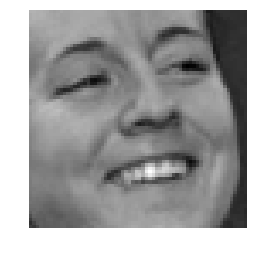

In [18]:
plot_face(X[64])

In [47]:
a_face = X[64]

In [19]:
# 1 is smile, 0 is no smile
y[64]

1

In [23]:
def plot_faces(instances, images_per_row=10, **options):
    size = 64
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.gray, **options)
    plt.axis("off")

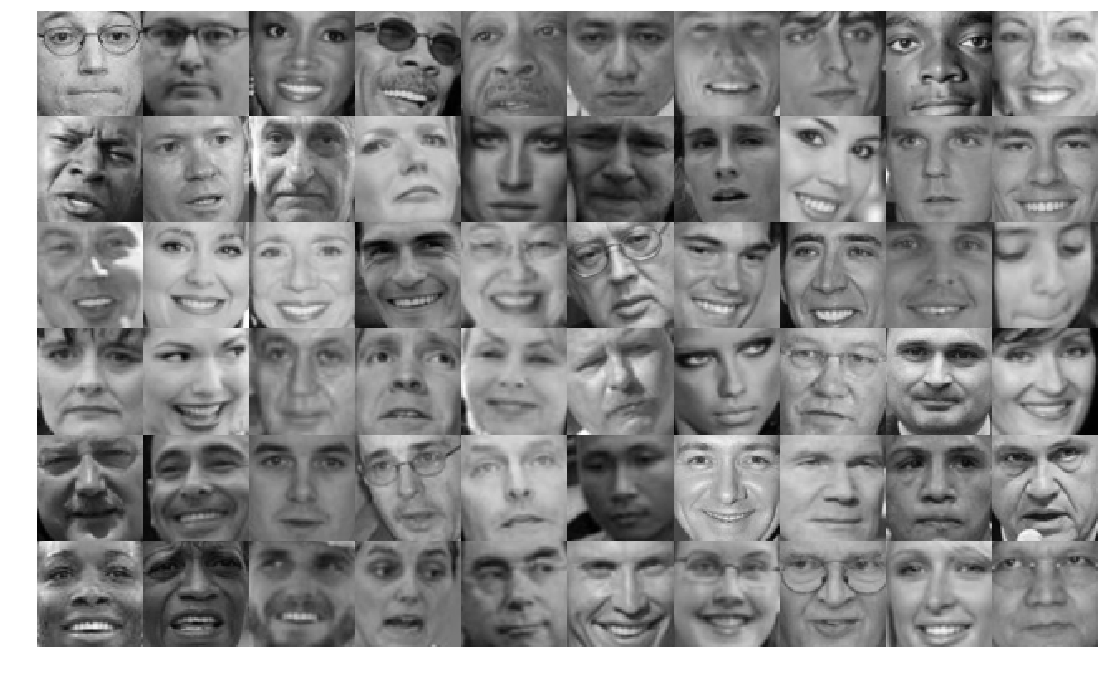

In [39]:
plt.figure(figsize=(19,19))
example_images = np.r_[X[:380:20], X[400:780:20], X[800:1203:19]] # start:stop:step
plot_faces(example_images, images_per_row=10)
plt.show()

In [40]:
shuffle_index = np.random.permutation(1203)
X, y = X[shuffle_index], y[shuffle_index]

In [59]:
#
# modeling

y_train, y_test = y[:1000], y[1000:]

#scaler = MinMaxScaler()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X[:1000].astype(np.float64))
X_test_scaled = scaler.fit_transform(X[1000:].astype(np.float64))

In [62]:
# random forest classifier

forest_clf = RandomForestClassifier(random_state=42)

In [63]:
# random forest (always one-vs-all)

forest_clf.fit(X_train_scaled, y_train)
forest_clf.predict([a_face])

array([1])

In [64]:
forest_clf.predict_proba([a_face])

array([[0.4, 0.6]])

In [65]:
# StandardScaler
cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.82934132, 0.82282282, 0.81681682])

In [58]:
# MinMaxScaler
cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.82934132, 0.81981982, 0.81681682])

In [67]:
# StandardScaler
# Error analysis
y_train_pred = cross_val_predict(forest_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[454,  54],
       [123, 369]])

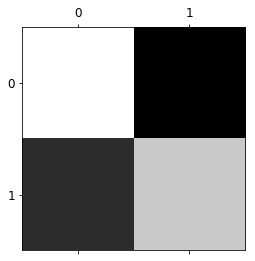

In [68]:
# note that actual is rows, predicted is columns

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [69]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

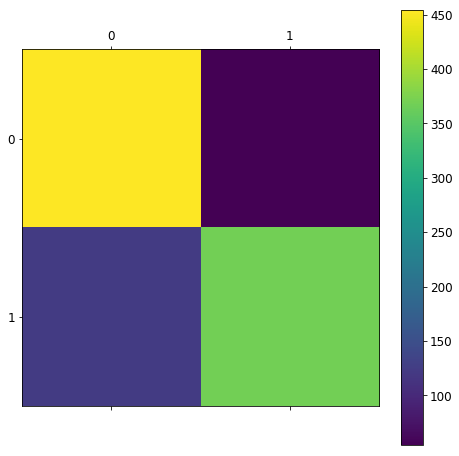

In [70]:
plot_confusion_matrix(conf_mx)

In [71]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

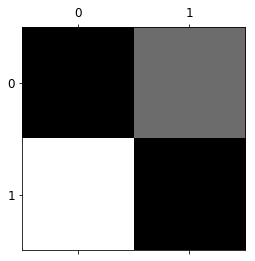

In [72]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

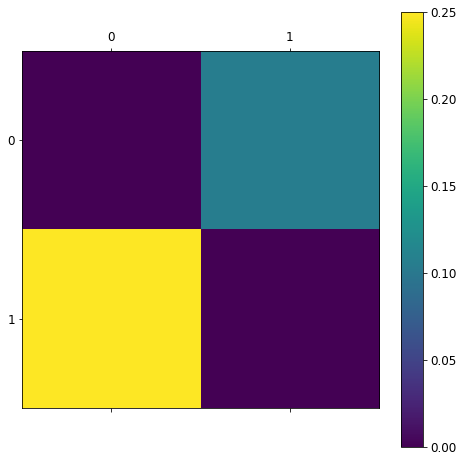

In [73]:
plot_confusion_matrix(norm_conf_mx)

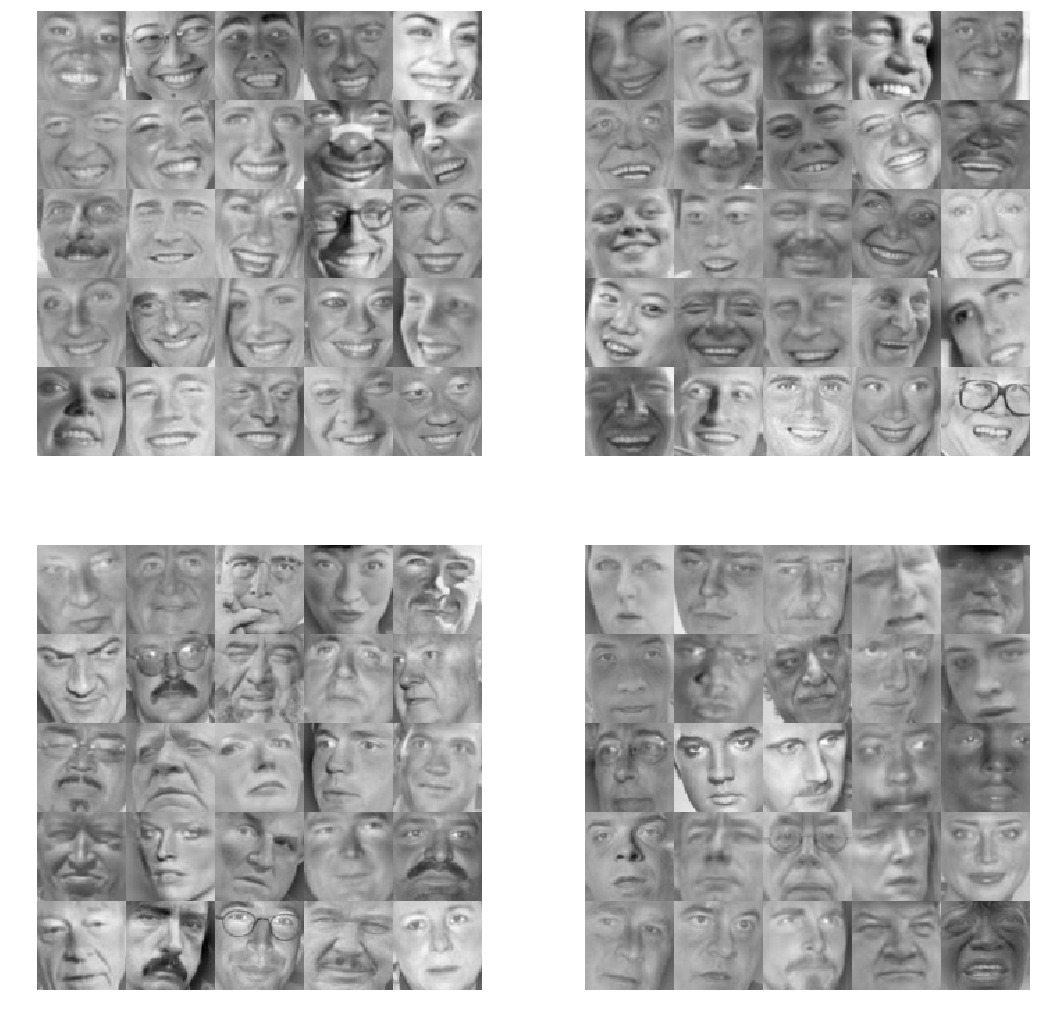

In [76]:
# individual error review
#  left column was classified as smile
#  right column was classified as no smile

cl_a, cl_b = 1, 0
X_aa = X_train_scaled[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train_scaled[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train_scaled[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train_scaled[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(18,18))
plt.subplot(221); plot_faces(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_faces(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_faces(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_faces(X_bb[:25], images_per_row=5)
plt.show()

In [80]:
np.save('smile/X_train_scaled.npy', X_train_scaled)
np.save('smile/X_test_scaled.npy', X_test_scaled)
np.save('smile/y_train.npy', y_train)
np.save('smile/y_test.npy', y_test)